In [1]:
import os
os.chdir('../')

In [2]:
from reports.util import load_config, read_rmse, find_config
from easydict import EasyDict
import matplotlib.pyplot as plt

def get_rmses_with_reference(sam_configs, ref_config, nfes):
    rmses = []
    for nfe in nfes:
        ref_config.NFE = nfe
        rmse = read_rmse(find_config(sam_configs, ref_config)[0].save_dir)
        rmses.append(rmse)
    return rmses


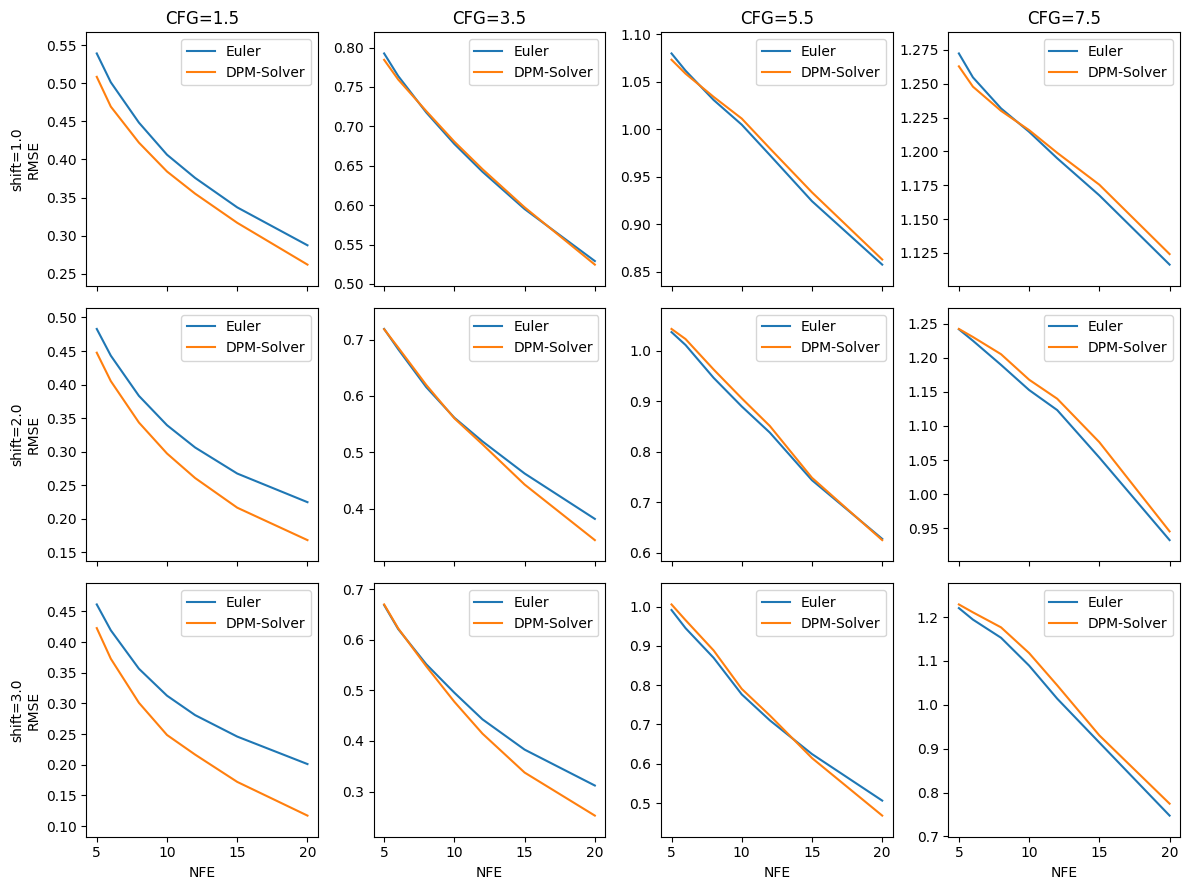

In [3]:
sam_root = 'samplings/sana/sam'
sam_configs = [load_config(os.path.join(sam_root, d)) for d in os.listdir(sam_root)]

nfes = [5, 6, 8, 10, 12, 15, 20]
cfgs = [1.5, 3.5, 5.5, 7.5]
shifts = [1.0, 2.0, 3.0]
solvers = ['Euler', 'DPM-Solver']

fig, axs = plt.subplots(len(shifts), len(cfgs), figsize=(3 * len(cfgs), 3 * len(shifts)), sharex=True)

for row, shift in enumerate(shifts):
    for col, cfg in enumerate(cfgs):
        ax = axs[row][col] if len(shifts) > 1 else axs[col]

        all_rmses = []
        for solver in solvers:
            ref_config = EasyDict(solver=solver, flow_shift=shift, CFG=cfg)
            rmses = get_rmses_with_reference(sam_configs, ref_config, nfes)
            all_rmses.append(rmses)
            ax.plot(nfes, rmses, label=solver)

        # 개별 subplot에 맞춰 ylim 설정 (±10% 여유)
        all_values = [v for rmse in all_rmses for v in rmse]
        min_val, max_val = min(all_values), max(all_values)
        margin = (max_val - min_val) * 0.1 if max_val > min_val else 1e-2
        ax.set_ylim(min_val - margin, max_val + margin)

        if row == 0:
            ax.set_title(f'CFG={cfg}')
        if col == 0:
            ax.set_ylabel(f'shift={shift}\nRMSE')
        if row == len(shifts) - 1:
            ax.set_xlabel('NFE')
        ax.legend()

plt.tight_layout()
plt.show()
